## WNS Hackathon

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import roc_auc_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

% matplotlib inline

In [4]:
train = pd.read_csv('./train_NA17Sgz/train.csv')
train.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0


In [5]:
train.dtypes
#len(set(train['user_id']))

impression_id      object
impression_time    object
user_id             int64
app_code            int64
os_version         object
is_4G               int64
is_click            int64
dtype: object

In [6]:
print('Shape of train set:', train.shape)
train.isna().sum()

Shape of train set: (237609, 7)


impression_id      0
impression_time    0
user_id            0
app_code           0
os_version         0
is_4G              0
is_click           0
dtype: int64

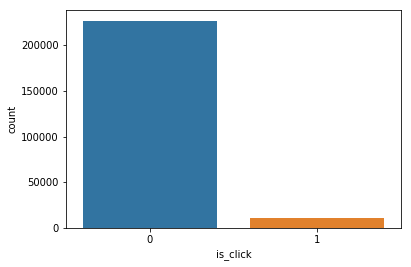

In [7]:
sns.countplot(x='is_click', data=train)

In [8]:
len(train.loc[train['is_click']==1])

10862

**So, only 4% of training set contains is_click = 1 label.**

In [9]:
view_log = pd.read_csv('./train_NA17Sgz/view_log.csv')
view_log.head()

,server_time,device_type,session_id,user_id,item_id
0,2018-10-15 08:58:00,android,112333,4557,32970
1,2018-10-15 08:58:00,android,503590,74788,7640
2,2018-10-15 08:58:00,android,573960,23628,128855
3,2018-10-15 08:58:00,android,121691,2430,12774
4,2018-10-15 08:58:00,android,218564,19227,28296


In [10]:
print('Shape of view_log:', view_log.shape)

Shape of view_log: (3118622, 5)


In [11]:
(set(view_log['device_type']))

{'android', 'iphone', 'web'}

In [12]:
view_log.loc[view_log['user_id']==62873]

,server_time,device_type,session_id,user_id,item_id
158831,2018-10-18 12:02:00,android,342525,62873,32155
335392,2018-10-22 07:46:00,android,476439,62873,118475
1225915,2018-11-08 19:18:00,android,1074318,62873,32155
1226129,2018-11-08 19:22:00,android,1074318,62873,76224
1342585,2018-11-10 23:56:00,android,805114,62873,52490
1442973,2018-11-12 20:03:00,android,763475,62873,73377
1443245,2018-11-12 20:06:00,android,763475,62873,28621
1554970,2018-11-14 20:02:00,android,586786,62873,45690
1563896,2018-11-14 21:42:00,android,809094,62873,4069
1584308,2018-11-15 02:54:00,android,351539,62873,74542


In [13]:
item_data = pd.read_csv('./train_NA17Sgz/item_data.csv')
item_data.head()

,item_id,item_price,category_1,category_2,category_3,product_type
0,26880,4602,11,35,20,3040
1,54939,3513,12,57,85,6822
2,40383,825,17,8,279,1619
3,8777,2355,13,58,189,5264
4,113705,1267,17,39,151,10239


In [14]:
print('Shape of item_data:', item_data.shape)

Shape of item_data: (132761, 6)


## Feature Engineering

In [2]:
# Label Encoding of Categorical Features.
lbl_enc = LabelEncoder()
train['os_version_enc'] = lbl_enc.fit_transform(train['os_version'])
test['os_version_enc'] = lbl_enc.transform(test['os_version'])


In [16]:
impression_time = pd.to_datetime(train['impression_time'])

In [17]:
# Making data time features from 'impression_time' of the ads.
impression_df = pd.DataFrame()
impression_df['impression_time'] = train['impression_time']
impression_df['year'] = impression_time.dt.year
impression_df['month'] = impression_time.dt.month
impression_df['day'] = impression_time.dt.day

impression_df['hour'] = impression_time.dt.hour
impression_df['mint'] = impression_time.dt.minute

In [18]:

train = train.merge(impression_df, on='impression_time', how='left')

## Combining item data and view logs

In [19]:
item_view_log = view_log.merge(item_data, on='item_id', how='left')

In [20]:
item_view_log.head()

,server_time,device_type,session_id,user_id,item_id,item_price,category_1,category_2,category_3,product_type
0,2018-10-15 08:58:00,android,112333,4557,32970,54685.0,16.0,56.0,253.0,3184.0
1,2018-10-15 08:58:00,android,503590,74788,7640,1376.0,7.0,71.0,228.0,545.0
2,2018-10-15 08:58:00,android,573960,23628,128855,4544.0,4.0,38.0,62.0,5609.0
3,2018-10-15 08:58:00,android,121691,2430,12774,904.0,17.0,39.0,252.0,2740.0
4,2018-10-15 08:58:00,android,218564,19227,28296,2304.0,12.0,57.0,54.0,7422.0


In [21]:
item_view_log['category_1'].value_counts()

9.0     408936
17.0    386521
1.0     374569
4.0     290638
13.0    244439
11.0    236065
7.0     174613
10.0    172682
14.0    166055
8.0     162489
12.0    136464
16.0    127734
0.0     120711
15.0     69094
6.0      45827
2.0          2
5.0          1
Name: category_1, dtype: int64

## Counting no. of items belonging to different categories in 'category_1' for each user

In [ ]:
# Counting no. of items belonging to different categories in 'category_1' for each user

category1_df = pd.pivot_table(item_view_log, values="item_id", index="user_id", columns="category_1", aggfunc="count", fill_value=0).reset_index()
print(category1_df.columns)

category1_df.columns = ["user_id"] + ["category1_"+str(i) for i in range(17)]


In [1]:
# Counting no. of items belonging to different categories in 'category_2' for each user

category2_df = pd.pivot_table(item_view_log, values="item_id", index="user_id", columns="category_2", aggfunc="count", fill_value=0).reset_index()
print(category2_df.columns)

category2_df.columns = ["user_id"] + ["category1_"+str(i) for i in range(79)]

## Heatmap

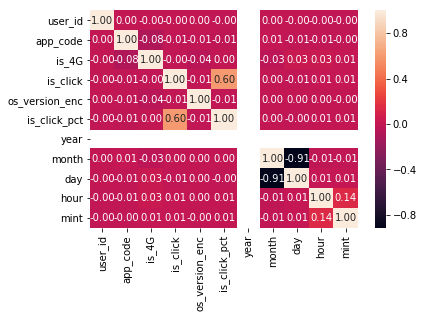

In [49]:
sns.heatmap(train.corr(), annot=True, fmt='.2f')

## Calculating Click-Percentage for each user

In [15]:
# Calculating click percentage for each user.

df = train.groupby(['user_id'])['is_click'].sum() / train.groupby(['user_id'])['is_click'].size()
#click_count_dict = dict(train.groupby(['user_id'])['is_click'].size())

In [16]:
train = train.join(df, on='user_id', how='left', rsuffix='_pct')

## Training

In [51]:
X = train[['is_click_pct', 'app_code', 'is_4G', 'os_version_enc', 'month', 'hour', 'mint']]
y = train['is_click']

In [52]:
# Dividing train set into 70% train set and remaining 30% as cross-validation set for model evaluation.
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=42)

## Xtreme Gradient Boosting model

In [53]:
reg = xgb.XGBRegressor()
reg = reg.fit(X_train , y_train)

In [54]:
pred_cv = reg.predict(X_cv)

In [55]:
mean_absolute_error(pred_cv, y_cv)

0.056448314934678494

## Working on real test set

In [20]:
test = pd.read_csv('./test.csv')
test.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G
0,a9e7126a585a69a32bc7414e9d0c0ada,2018-12-13 07:44:00,44754,127,latest,1
1,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,0
2,13f10ba306a19ce7bec2f3cae507b698,2018-12-13 07:46:00,25234,296,latest,1
3,39c4b4dc0e9701b55a0a4f072008fb3f,2018-12-13 07:47:00,22988,207,latest,1
4,bf5a572cca75f5fc67f4b14e58b11d70,2018-12-13 07:48:00,35431,242,latest,1


In [30]:
test = test.join(df, on='user_id', how='left', rsuffix='_pct')


In [35]:
test = test.fillna(0.0000)

In [40]:
test = test.rename(columns={'is_click': 'is_click_pct'})

In [60]:
X_test = test[['is_click_pct', 'app_code', 'is_4G']]

In [61]:
pred_test = reg.predict(X_test)

In [67]:
result = pd.DataFrame()
result['impression_id'] = test['impression_id']
result['is_click'] = np.abs(pred_test)

In [68]:
result.to_csv('submission.csv', index=False)